In [76]:
from __future__ import print_function 
import numpy as np 
import matplotlib.pyplot as plt
import copy 
import math
import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.ensemble  import RandomForestClassifier
from sklearn.model_selection import cross_validate
from sklearn.metrics import recall_score

##  전처리

In [56]:
SAM2_data=pd.read_csv('./role_ml/sam2.csv',encoding='utf-8' ) # SAM2데이터
SAA8_data=pd.read_csv('./role_ml/SAA8.csv',encoding='utf-8' ) # SAa8

In [57]:
SAM2_train_set,SAM2_test_set = train_test_split(SAM2_data,test_size=0.3,random_state=42) #state는 seed
SAA8_train_set,SAA8_test_set = train_test_split(SAA8_data,test_size=0.3,random_state=42) #state는 seed

## Random forest

In [4]:
rf=RandomForestClassifier(n_estimators=100,max_leaf_nodes=8,n_jobs=-1,max_depth=2)

In [5]:
rf.fit(SAM2_train_set,SAM2_train_set['judge'])

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=2, max_features='auto', max_leaf_nodes=8,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [6]:
rf.score(SAM2_test_set,SAM2_test_set['judge'])

1.0

## 다른모델로 분류하기(LogisticRegression)

In [7]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
scores = cross_validate(lr, SAM2_data.drop(['judge'],1), SAM2_data.judge, cv=5, return_train_score=False)
scores

C:\Program Files\Anaconda3\envs\tensor\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Program Files\Anaconda3\envs\tensor\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Program Files\Anaconda3\envs\tensor\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Program Files\Anaconda3\envs\tensor\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Program Files\Anaconda3\envs\tensor\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default so

{'fit_time': array([0.12480068, 0.26770163, 0.20280147, 0.14800334, 0.17160106]),
 'score_time': array([0.03120041, 0.        , 0.        , 0.        , 0.        ]),
 'test_score': array([0.9979881 , 0.99763821, 0.99763821, 0.99772548, 0.99772548])}

## 다른모델로 분류하기(SVM)

In [8]:
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score

In [9]:
clf = LinearSVC(C=1,loss='hinge')  # 선형 분류
clf2=SVC(kernel="poly",degree=3,coef0=1,C=5)  #다항식 커널

from sklearn import metrics
scores = cross_val_score( clf, SAM2_data.drop(['judge'],1), SAM2_data.judge, cv=5)
print(scores.mean())

C:\Program Files\Anaconda3\envs\tensor\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Program Files\Anaconda3\envs\tensor\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Program Files\Anaconda3\envs\tensor\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Program Files\Anaconda3\envs\tensor\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


0.9976731184563798


C:\Program Files\Anaconda3\envs\tensor\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


## Decision tree

In [10]:
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# 한글출력
matplotlib.rc('font', family='NanumBarunGothic')
matplotlib.rcParams['axes.unicode_minus'] = False

# 그림을 저장할 폴드
PROJECT_ROOT_DIR = "."

def image_path(fig_id):
    return os.path.join(PROJECT_ROOT_DIR, fig_id)

def save_fig(fig_id, tight_layout=True):
    if tight_layout:
        plt.tight_layout()
    plt.savefig(image_path(fig_id) + ".png", format='png', dpi=300)

In [52]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
y = SAM2_data['judge']

data2=SAM2_data.drop(['judge'],1)

X = data2 # petal length and width
tree_clf = DecisionTreeClassifier(max_depth=3, random_state=42)
tree_clf.fit(X, y)
tree_clf.score(X,y)

0.9979530424437524

In [28]:
from sklearn.tree import export_graphviz
export_graphviz(
        tree_clf,
        out_file=image_path("RF.dot"),
        feature_names=data2.columns.values,
        class_names=['OK','NG'],
        rounded=True,
        filled=True
    )

In [29]:
import graphviz
with open("RF.dot") as f:
    dot_graph = f.read()
dot = graphviz.Source(dot_graph)
dot.format = 'png'
dot.render(filename='iris_tree', directory='./images/decision_trees', cleanup=True)
dot

CalledProcessError: Command '['dot.bat', '-Tpng', '-O', './images/decision_trees\\iris_tree']' returned non-zero exit status 1.

In [ ]:
# 그림이 왜 안될까 / 클러스터링과 함께 고민할 것

In [59]:
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
distortions = []
K = range(2,8)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(SAM2_train_set)
    kmeanModel.fit(SAM2_train_set)
    distortions.append(sum(np.min(cdist(SAM2_train_set, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / SAM2_train_set.shape[0])

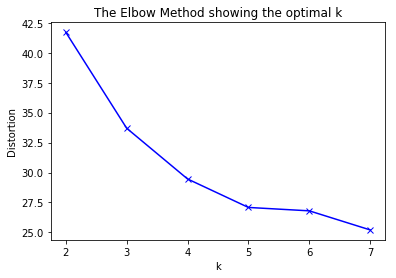

In [60]:
# Plot the elbow
#plt.plt(K, distortions, 'bx-')
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [85]:
data2=SAM2_data.drop(['judge'],1)
model = KMeans(n_clusters=2, init="random").fit(data2)
c0, c1 = model.cluster_centers_ # 중앙값 정하기
km_result =model.labels_


In [87]:
km_result.shape

(57158,)

In [91]:
SAM2_data['result_cluster']=model.labels_
SAM2_data.to_csv('C:/Users/mando/Desktop/ssd/K_result.csv') # 군집분석 결과는 상이하게 다름